In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from scipy.optimize import curve_fit
from pylab import *

In [3]:
pairwise_1 = pd.read_hdf('/Users/johnmarshall/Documents/MATLAB/04-May_00_39_45_pairwise_distance_comparisons.h5')
pairwise_2 = pd.read_hdf('/Users/johnmarshall/Documents/MATLAB/29-Apr_16_52_17_pairwise_distance_comparisons.h5')

In [4]:
r_coeffs_1 = np.array([pairwise_1[pair][0] for pair in list(pairwise_1.keys())])
distance_1 = np.array([pairwise_1[pair][1] for pair in list(pairwise_1.keys())])

In [5]:
r_coeffs_2 = np.array([pairwise_2[pair][0] for pair in list(pairwise_2.keys())])
distance_2 = np.array([pairwise_2[pair][1] for pair in list(pairwise_2.keys())])

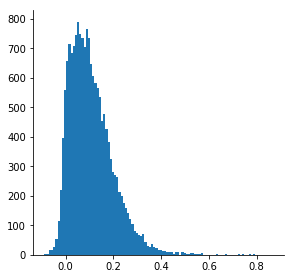

In [177]:
#plot both GRIN011 and GRIN009 histograms
hist_1, bin_edges_1 = np.histogram(r_coeffs_1, bins='auto', density=True)
#hist_2, bin_edges_2 = np.histogram(r_coeffs_2, bins='auto', density=True)

plt.figure(figsize=(4.5,4.5), frameon=False)
plt.hist(r_coeffs_1, bins=bin_edges_1, density=False)
#plt.hist(r_coeffs_2, bins=bin_edges_2, density=True, alpha=0.4)
#for saving figure to plot
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)

plt.draw()
plt.savefig('/Users/johnmarshall/Documents/Grants/GRIN_011_pairwise.png')
plt.savefig('/Users/johnmarshall/Documents/Grants/GRIN_011_pairwise.svg', transparent=True, format="svg")

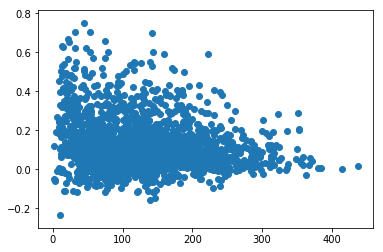

In [7]:
plt.scatter(distance_2, r_coeffs_2)
plt.show()

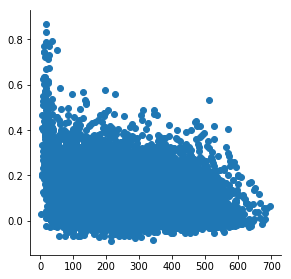

In [178]:
plt.figure(figsize=(4.5,4.5), frameon=False)

plt.scatter(distance_1, r_coeffs_1)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)

plt.draw()
plt.savefig('/Users/johnmarshall/Documents/Grants/GRIN_011_pairwise_distance.png')
plt.savefig('/Users/johnmarshall/Documents/Grants/GRIN_011_pairwise_distance.svg', transparent=True, format="svg")


In [165]:
x = distance_2
y = r_coeffs_2
def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c
popt, pcov = curve_fit(exponential_func, x, y, p0=(1, 1e-1/100, 1))

In [166]:
popt

array([0.15679648, 0.02209691, 0.10178129])

In [167]:
pcov

array([[4.84076159e-04, 6.90581721e-05, 2.23478700e-05],
       [6.90581721e-05, 2.21314745e-05, 1.94431630e-05],
       [2.23478700e-05, 1.94431630e-05, 3.11788326e-05]])

In [168]:
xx = np.linspace(0, 700, 1000)
yy = exponential_func(xx, *popt)

In [169]:
#yy

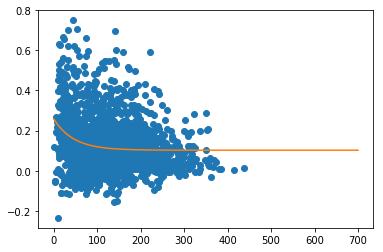

In [170]:
plt.plot(x,y,'o', xx, yy)

In [107]:
1e-2

0.01

In [110]:
1**-2

1.0